# LDA y QDA para clasificación de calidad de vinos
Se presentan cuatro versiones: LDA y QDA, cada uno sin escalar y con escalado de variables, para comparar el impacto del preprocesamiento en el desempeño de ambos modelos.

## 1. LDA sin escalar

Entrenamos y evaluamos un modelo LDA usando los datos originales, sin escalar las variables predictoras.

Exactitud en test: 0.5895833333333333

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.66      0.74      0.70       204
           6       0.55      0.58      0.56       192
           7       0.58      0.35      0.44        60
           8       0.00      0.00      0.00         5

    accuracy                           0.59       480
   macro avg       0.30      0.28      0.28       480
weighted avg       0.57      0.59      0.58       480



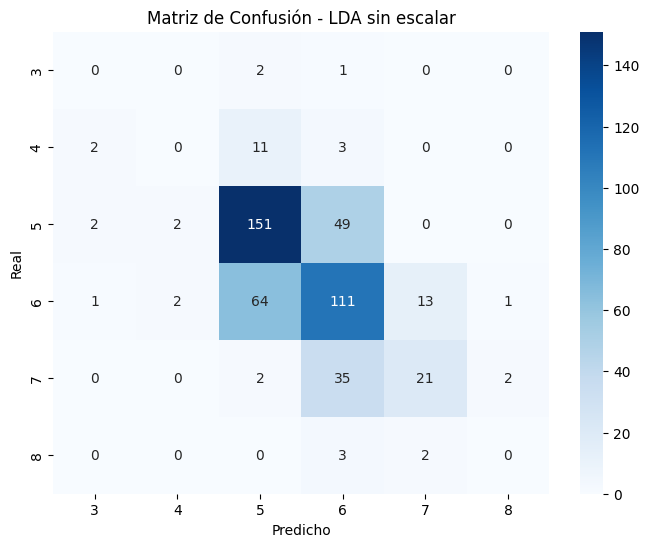

Accuracy medio CV (5 folds): 0.5728781347962382


In [1]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo LDA sin escalar
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - LDA sin escalar')
plt.show()

# Validación cruzada
scores = cross_val_score(lda, X, y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

## 2. LDA con escalado

Ahora estandarizamos las variables predictoras antes de entrenar el modelo LDA, para observar el impacto del preprocesamiento.

Exactitud en test: 0.5895833333333333

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.66      0.74      0.70       204
           6       0.55      0.58      0.56       192
           7       0.58      0.35      0.44        60
           8       0.00      0.00      0.00         5

    accuracy                           0.59       480
   macro avg       0.30      0.28      0.28       480
weighted avg       0.57      0.59      0.58       480

Accuracy medio CV (5 folds): 0.5728781347962382


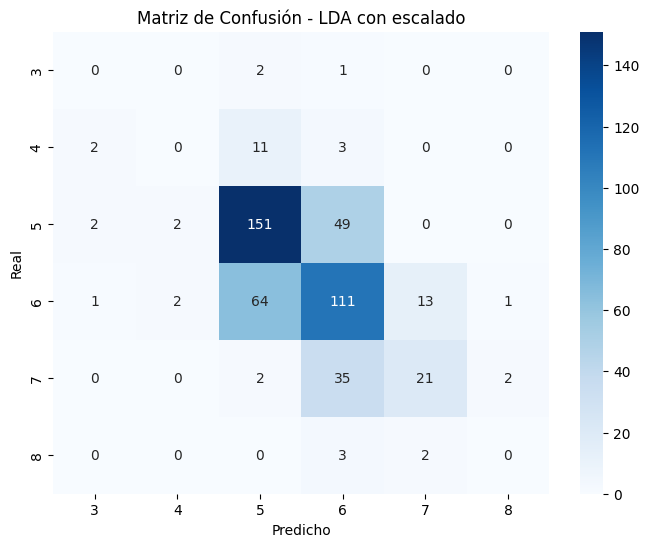

In [1]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo LDA con escalado
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred = lda.predict(X_test_scaled)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Validación cruzada
scores = cross_val_score(lda, scaler.transform(X), y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - LDA con escalado')
plt.show()



## 3. QDA sin escalar

Entrenamos y evaluamos un modelo QDA usando los datos originales, sin escalar las variables predictoras.

Exactitud en test: 0.55625

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.13      0.12      0.13        16
           5       0.65      0.60      0.62       204
           6       0.52      0.60      0.56       192
           7       0.54      0.43      0.48        60
           8       0.14      0.20      0.17         5

    accuracy                           0.56       480
   macro avg       0.33      0.33      0.33       480
weighted avg       0.56      0.56      0.55       480



c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3

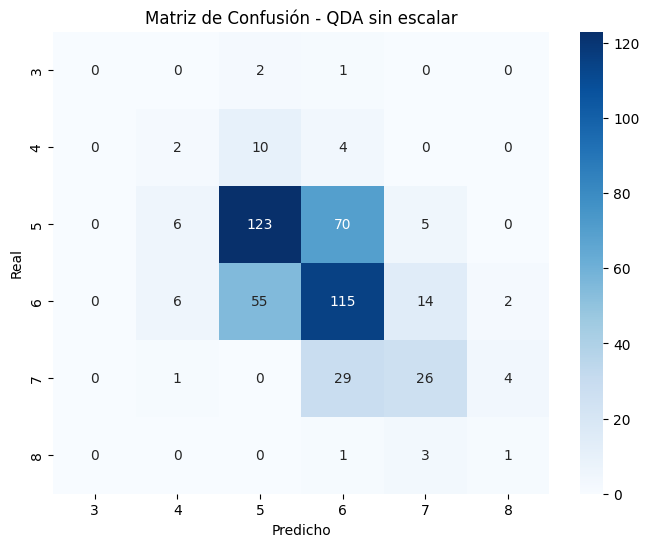

Accuracy medio CV (5 folds): 0.5272139498432602


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3

In [3]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo QDA sin escalar
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - QDA sin escalar')
plt.show()

# Validación cruzada
scores = cross_val_score(qda, X, y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

## 4. QDA con escalado

Ahora estandarizamos las variables predictoras antes de entrenar el modelo QDA, para observar el impacto del preprocesamiento.

Exactitud en test: 0.55625

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.13      0.12      0.13        16
           5       0.65      0.60      0.62       204
           6       0.52      0.60      0.56       192
           7       0.54      0.43      0.48        60
           8       0.14      0.20      0.17         5

    accuracy                           0.56       480
   macro avg       0.33      0.33      0.33       480
weighted avg       0.56      0.56      0.55       480

Accuracy medio CV (5 folds): 0.5272139498432602


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\M

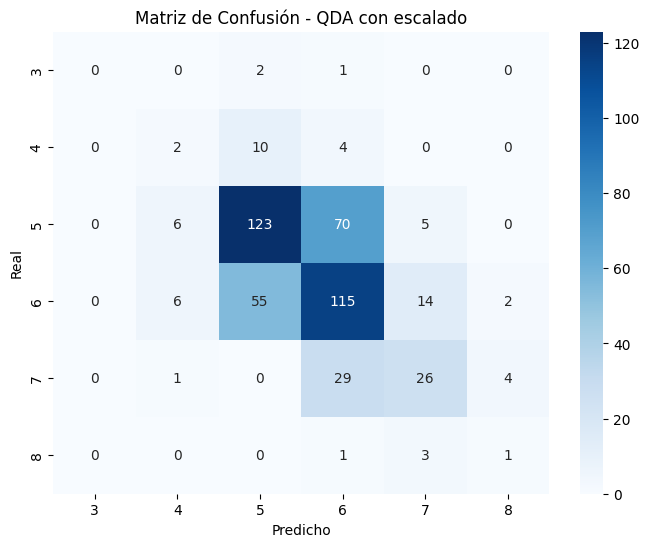

In [2]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo QDA con escalado
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)
y_pred = qda.predict(X_test_scaled)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Validación cruzada
scores = cross_val_score(qda, scaler.transform(X), y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - QDA con escalado')
plt.show()



Accuracy en test (LDA): 0.5895833333333333

Reporte de clasificación (LDA):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.66      0.74      0.70       204
           6       0.55      0.58      0.56       192
           7       0.58      0.35      0.44        60
           8       0.00      0.00      0.00         5

    accuracy                           0.59       480
   macro avg       0.30      0.28      0.28       480
weighted avg       0.57      0.59      0.58       480



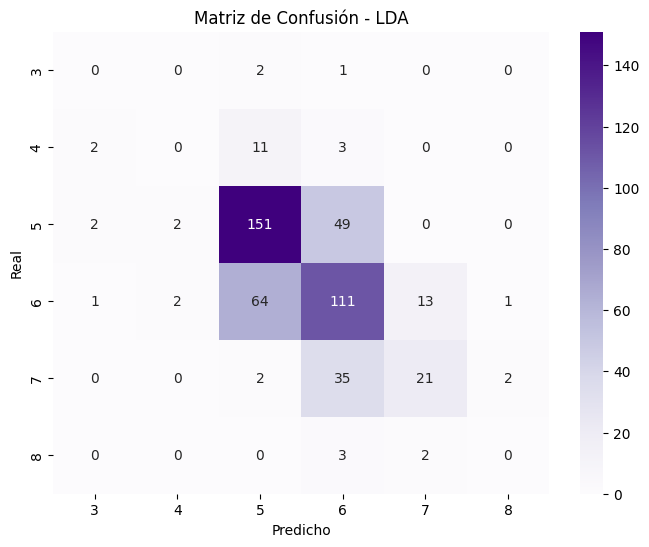

In [6]:
# --- 0) Librerías
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# --- 1) Definir modelo LDA
lda = LinearDiscriminantAnalysis()

# --- 2) Entrenamiento
lda.fit(X_train_scaled, y_train)  # mejor con escalado, por estabilidad numérica

# --- 3) Predicciones
y_pred_lda = lda.predict(X_test_scaled)

# --- 4) Evaluación
print("Accuracy en test (LDA):", accuracy_score(y_test, y_pred_lda))
print("\nReporte de clasificación (LDA):\n", classification_report(y_test, y_pred_lda))

# --- 5) Matriz de confusión
cm_lda = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(8,6))
sns.heatmap(cm_lda, annot=True, fmt="d", cmap="Purples", 
            xticklabels=np.sort(y.unique()), 
            yticklabels=np.sort(y.unique()))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - LDA")
plt.show()


Accuracy en test (QDA): 0.55625

Reporte de clasificación (QDA):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.13      0.12      0.13        16
           5       0.65      0.60      0.62       204
           6       0.52      0.60      0.56       192
           7       0.54      0.43      0.48        60
           8       0.14      0.20      0.17         5

    accuracy                           0.56       480
   macro avg       0.33      0.33      0.33       480
weighted avg       0.56      0.56      0.55       480



c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\M

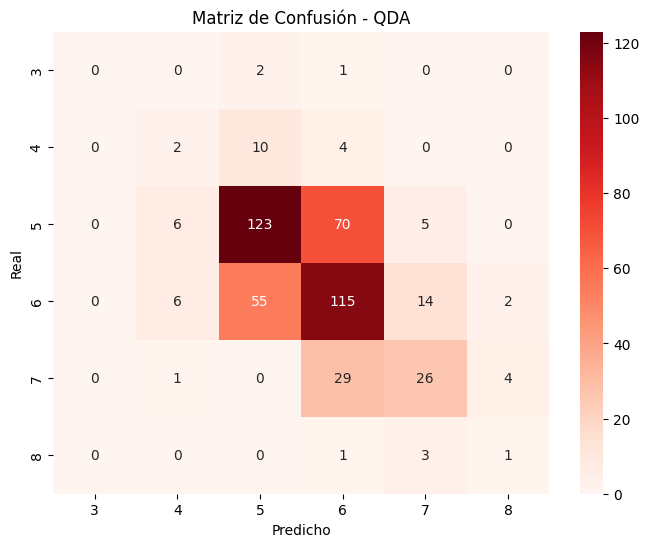

In [7]:
# --- 0) Librerías
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# --- 1) Definir modelo QDA
qda = QuadraticDiscriminantAnalysis()

# --- 2) Entrenamiento
qda.fit(X_train_scaled, y_train)  # escalado también recomendado

# --- 3) Predicciones
y_pred_qda = qda.predict(X_test_scaled)

# --- 4) Evaluación
print("Accuracy en test (QDA):", accuracy_score(y_test, y_pred_qda))
print("\nReporte de clasificación (QDA):\n", classification_report(y_test, y_pred_qda))

# --- 5) Matriz de confusión
cm_qda = confusion_matrix(y_test, y_pred_qda)
plt.figure(figsize=(8,6))
sns.heatmap(cm_qda, annot=True, fmt="d", cmap="Reds", 
            xticklabels=np.sort(y.unique()), 
            yticklabels=np.sort(y.unique()))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - QDA")
plt.show()


## 5. LDA y QDA con escalado y datos balanceados

A continuación se muestran las versiones de LDA y QDA aplicadas sobre los datos estandarizados y balanceados mediante sobremuestreo (RandomOverSampler), para comparar con las versiones originales.

LDA balanceado - Exactitud en test: 0.4395833333333333

Reporte de clasificación (LDA balanceado):
               precision    recall  f1-score   support

           3       0.05      0.33      0.09         3
           4       0.04      0.19      0.07        16
           5       0.70      0.56      0.62       204
           6       0.57      0.32      0.41       192
           7       0.38      0.50      0.43        60
           8       0.02      0.20      0.04         5

    accuracy                           0.44       480
   macro avg       0.29      0.35      0.28       480
weighted avg       0.57      0.44      0.49       480



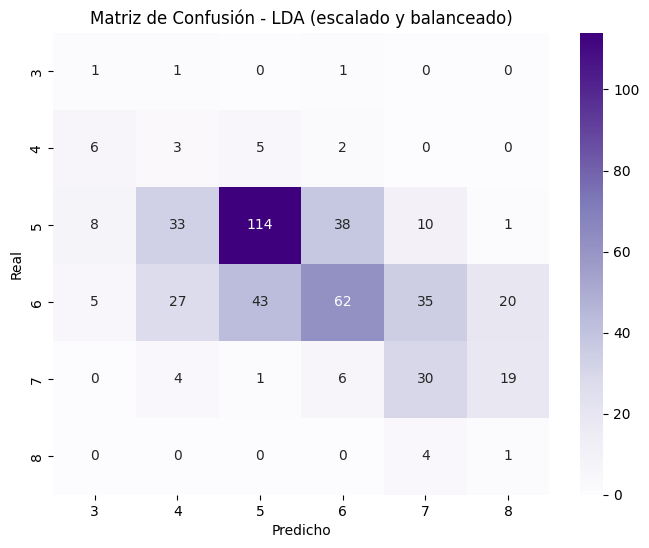

Accuracy medio CV (5 folds, LDA balanceado): 0.5429612272544209


In [6]:
# LDA balanceado (escalado y balanceado)
from imblearn.over_sampling import RandomOverSampler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear solo el set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

lda_bal = LinearDiscriminantAnalysis()
lda_bal.fit(X_train_bal, y_train_bal)
y_pred_lda_bal = lda_bal.predict(X_test_scaled)
print("LDA balanceado - Exactitud en test:", accuracy_score(y_test, y_pred_lda_bal))
print("\nReporte de clasificación (LDA balanceado):\n", classification_report(y_test, y_pred_lda_bal))
cm_lda_bal = confusion_matrix(y_test, y_pred_lda_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_lda_bal, annot=True, fmt="d", cmap="Purples", xticklabels=np.sort(np.unique(y)), yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - LDA (escalado y balanceado)")
plt.show()
scores_lda_bal = cross_val_score(lda_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, LDA balanceado):", scores_lda_bal.mean())

QDA balanceado - Exactitud en test: 0.5041666666666667

Reporte de clasificación (QDA balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.19      0.38      0.26        16
           5       0.68      0.56      0.61       204
           6       0.52      0.44      0.48       192
           7       0.34      0.58      0.43        60
           8       0.12      0.40      0.18         5

    accuracy                           0.50       480
   macro avg       0.31      0.39      0.33       480
weighted avg       0.55      0.50      0.52       480



c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\M

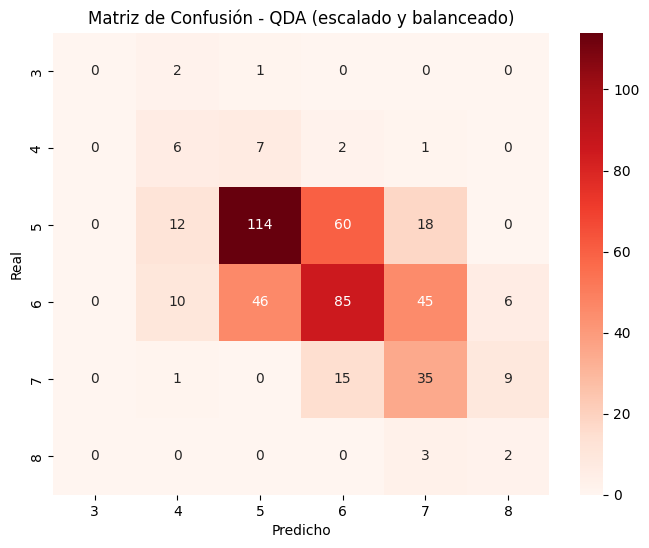

Accuracy medio CV (5 folds, QDA balanceado): 0.6470850266661785


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0

In [7]:
# QDA balanceado (escalado y balanceado)
from imblearn.over_sampling import RandomOverSampler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear solo el set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

qda_bal = QuadraticDiscriminantAnalysis()
qda_bal.fit(X_train_bal, y_train_bal)
y_pred_qda_bal = qda_bal.predict(X_test_scaled)
print("QDA balanceado - Exactitud en test:", accuracy_score(y_test, y_pred_qda_bal))
print("\nReporte de clasificación (QDA balanceado):\n", classification_report(y_test, y_pred_qda_bal))
cm_qda_bal = confusion_matrix(y_test, y_pred_qda_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_qda_bal, annot=True, fmt="d", cmap="Reds", xticklabels=np.sort(np.unique(y)), yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - QDA (escalado y balanceado)")
plt.show()
scores_qda_bal = cross_val_score(qda_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, QDA balanceado):", scores_qda_bal.mean())